In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install category_encoders
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#  Load and Explore the Data

### Load the dataset into a Pandas DataFrame.

In [5]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Perform exploratory data analysis (EDA):

In [7]:

data.shape

(1025, 14)

In [8]:
dup_row = data.duplicated()
dup_row

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [9]:
dup_row.sum()

723

In [10]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [11]:
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [12]:
data.shape

(1025, 14)

In [13]:
dup_col = data.columns.duplicated()
dup_col

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [14]:
dup_col.sum()

0

### Check for missing values, data types, and summary statistics.



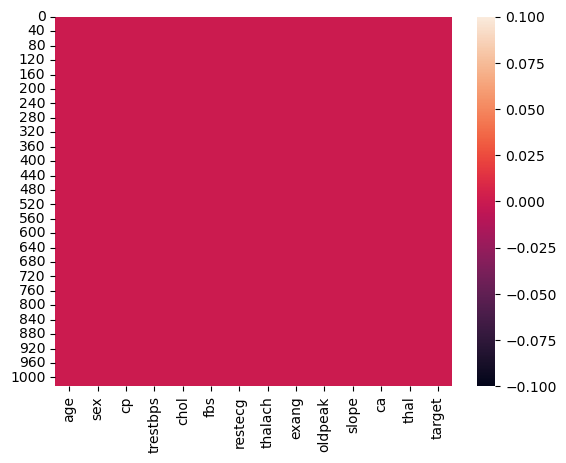

In [16]:
sns.heatmap(data.isna())
plt.show()

## NO missing values

In [17]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [20]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Analyze the distribution of categorical variables.

In [22]:
num_df = data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [23]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

# No categorical columns

Numerical columns are
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Categorical columns are
[]


### Identify potential outliers in numerical columns.

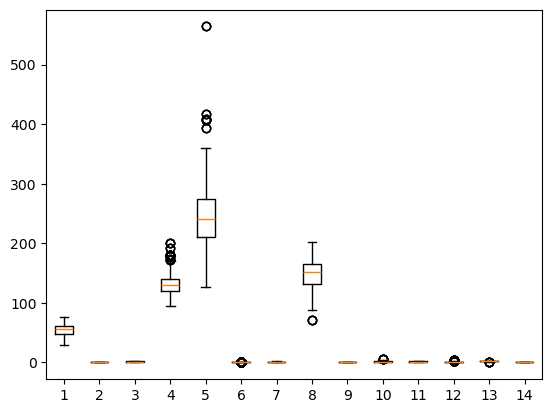

In [25]:
plt.boxplot(num_df)
plt.show()


In [26]:
# outliers can be seen on the trestbps, chol (outliers above the upper bound), thalach (below lower bound)
# other outliers can be seen on fbs, oldpeak, ca and thal

# Step 2: Data Cleaning and Preprocessing

### Handle Outliers

In [29]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [30]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

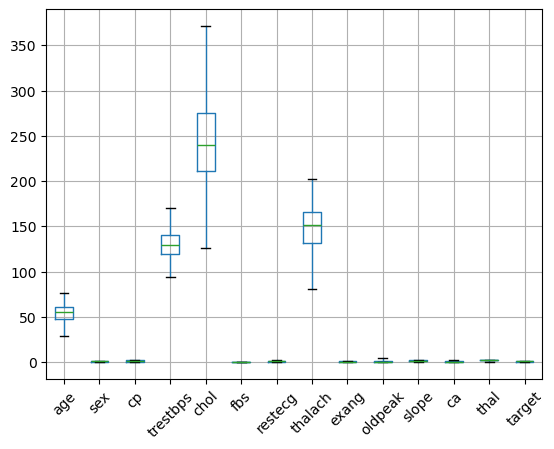

In [31]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

### Encoding

In [33]:
multi_df = data[["cp", "restecg", "thal"]]
bin_df = data[["sex", "fbs"]]

In [34]:
#ONEHOT ENCODING  -  MULTI-CATEGORY VARIABLES

color_onehot = pd.get_dummies(multi_df, columns=["cp", "restecg", "thal"], drop_first = True, dtype=int)
color_onehot
data = pd.concat([data, color_onehot], axis=1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,0,0,0,1,0,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,0,0,0,0,0,0,0,1
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,0,0,0,1,0,0,0,1
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,0,0,0,1,0,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,2,1,1,0,0,1,0,0,1,0
1021,60,1,0,125,258,0,0,141,1,2.8,...,3,0,0,0,0,0,0,0,0,1
1022,47,1,0,110,275,0,0,118,1,1.0,...,2,0,0,0,0,0,0,0,1,0
1023,50,0,0,110,254,0,0,159,0,0.0,...,2,1,0,0,0,0,0,0,1,0


In [35]:
bin_enc=BinaryEncoder()
bin_df=bin_df.astype("category")

In [62]:
bin_cod=bin_enc.fit_transform(bin_df)
bin_cod

,sex_0,sex_1,fbs_0,fbs_1
0,0,1,0,1
1,0,1,1,0
2,0,1,0,1
3,0,1,0,1
4,1,0,1,0
...,...,...,...,...
1020,0,1,0,1
1021,0,1,0,1
1022,0,1,0,1
1023,1,0,0,1


In [68]:
data = pd.concat([data, bin_cod], axis=1)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2,thal_3,sex_0,sex_1,fbs_0,fbs_1,sex_0,sex_1,fbs_0,fbs_1
0,52,1,0,125,212,0,1,168,0,1.0,...,0,1,0,1,0,1,0,1,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,1,0,1,1,0,0,1,1,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,1,0,1,0,1,0,1,0,1
3,61,1,0,148,203,0,1,161,0,0.0,...,0,1,0,1,0,1,0,1,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,...,1,0,0,1,0,1,0,1,0,1
1021,60,1,0,125,258,0,0,141,1,2.8,...,0,1,0,1,0,1,0,1,0,1
1022,47,1,0,110,275,0,0,118,1,1.0,...,1,0,0,1,0,1,0,1,0,1
1023,50,0,0,110,254,0,0,159,0,0.0,...,1,0,1,0,0,1,1,0,0,1


### Scaling

In [71]:
std_scaler=StandardScaler()
cols=["trestbps","chol","thalach","oldpeak"]
scaled_std=std_scaler.fit_transform(data[cols])
scaled_std=pd.DataFrame(scaled_std,columns=[cols])
data[cols]=scaled_std
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_2,thal_3,sex_0,sex_1,fbs_0,fbs_1,sex_0,sex_1,fbs_0,fbs_1
0,52,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,...,0,1,0,1,0,1,0,1,0,1
1,53,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,...,0,1,0,1,1,0,0,1,1,0
2,70,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,...,0,1,0,1,0,1,0,1,0,1
3,61,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,...,0,1,0,1,0,1,0,1,0,1
4,62,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,...,1,0,0,1,0,1,0,1,0,1
1021,60,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,...,0,1,0,1,0,1,0,1,0,1
1022,47,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,...,1,0,0,1,0,1,0,1,0,1
1023,50,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,...,1,0,1,0,0,1,1,0,0,1


# Train Test Split

In [103]:
#For Regression
x1=data.drop(["chol"],axis=1)

y1=data["chol"]

In [105]:
#For classification
x2=data.drop(["target"], axis=1)
y2=data["target"]

In [107]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=2)

In [135]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=2)

# Build Machine Learning Models

In [138]:
#For Regression

model=LinearRegression()
model.fit(x1_test,y1_test)
predicted_chol=model.predict(x1_test)

In [140]:
mse=mean_squared_error(y1_test,predicted_chol)
r2=r2_score(y1_test,predicted_chol)
mae=mean_absolute_error(y1_test,predicted_chol)

In [141]:
print("Mean Squared Error=", mse)
print("R2 score = ",r2)
print("Mean Absolute Error=", mae)

Mean Squared Error= 0.866700868769169
R2 score =  0.2730305844405181
Mean Absolute Error= 0.6744739962991588


In [144]:
#For Classification - logistic Regression

model = LogisticRegression()
model.fit(x2_test,y2_test)
y2_pred=model.predict(x2_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
accuracy=accuracy_score(y2_test,y2_pred)
precision=precision_score(y2_test,y2_pred,average="weighted")
recall=recall_score(y2_test,y2_pred,average="weighted")
f1=f1_score(y2_test,y2_pred,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)

Accuracy is 0.8829268292682927 
Precison is 0.890556597873671 
Recall is 0.8829268292682927 
F1 score is 0.8825751408381908


In [148]:
##KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train, y2_train) 
y2_pred = knn.predict(x2_test)

In [151]:
accuracy=accuracy_score(y2_test,y2_pred)
precision=precision_score(y2_test,y2_pred,average="weighted")
recall=recall_score(y2_test,y2_pred,average="weighted")
f1=f1_score(y2_test,y2_pred,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)

Accuracy is 0.8731707317073171 
Precison is 0.8732526062624731 
Recall is 0.8731707317073171 
F1 score is 0.8731284311127845


In [153]:
## Naive Bayers
model=GaussianNB()
model.fit(x2_train,y2_train)
y2_pred=model.predict(x2_test)

In [155]:
accuracy=accuracy_score(y2_test,y2_pred)
precision=precision_score(y2_test,y2_pred,average="weighted")
recall=recall_score(y2_test,y2_pred,average="weighted")
f1=f1_score(y2_test,y2_pred,average="weighted")
print("Accuracy is",accuracy,"\nPrecison is",precision,"\nRecall is",recall,"\nF1 score is",f1)

Accuracy is 0.8 
Precison is 0.800952380952381 
Recall is 0.8 
F1 score is 0.8
